In [1]:
import numpy as np
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

In [2]:
n_slides = 5
a = list(range(n_slides))
b = list(range(n_slides))
c = list(range(n_slides))

a_init = 5
b_init = 3
c_init = 5
S_init = np.array([a_init,b_init,c_init])
T = 200
N = 2*T+1

T_init = T

In [3]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])

In [4]:
def getAtForS_atbc(S, T, t_dpc):
    ats[S[0], S[1], S[2], 0, T] = 1
    for i in range(T):
        ts = np.power(np.array([i+1] * 3), t_dpc)
        S_withT = np.multiply(S, ts)
        norm_S = S_withT / sum(S_withT)
#         print(i)
#         print(S)
#         print(ts)
#         print(S_withT)
#         print(norm_S)
        for j in range(T-(i+1), T+(i+1)+1, 1):
            if j - 1 >= 0:
                ats[S[0], S[1], S[2], i+1, j-1] += norm_S[0] * ats[S[0], S[1], S[2], i, j]
            ats[S[0], S[1], S[2], i+1, j] += norm_S[1] * ats[S[0], S[1], S[2], i, j]
            if j + 1 <= 2*T:
                ats[S[0], S[1], S[2], i+1, j+1] += norm_S[2] * ats[S[0], S[1], S[2], i, j]
def initializeAts(t_dpc):
    ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
    for i in range(n_slides + 1):
        for j in range(n_slides + 1):
            for k in range(n_slides + 1):
                if not i + j + k == 0:
                    S = np.array([i, j, k])
                    getAtForS_atbc(S, T, t_dpc)
                print(str((n_slides+1)**2*i + (n_slides+1)*j + (k+1)) + '/' + str((n_slides+1)**3), end='\r')

### stencil: (a,b,c)

In [5]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([0, 0, 0]) # a, b, c
S = np.array([5, 3, 2])

In [6]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


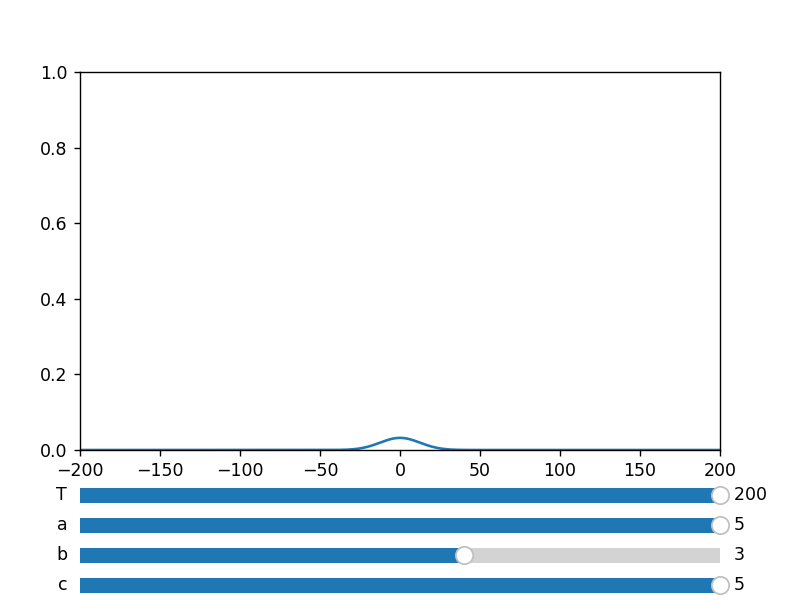

In [7]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T_init])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T_init,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)
plt.show()

### stencil: (a*t, b, c)

In [8]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([1, 0, 0]) # a*t, b, c
S = np.array([5, 3, 2])

In [9]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


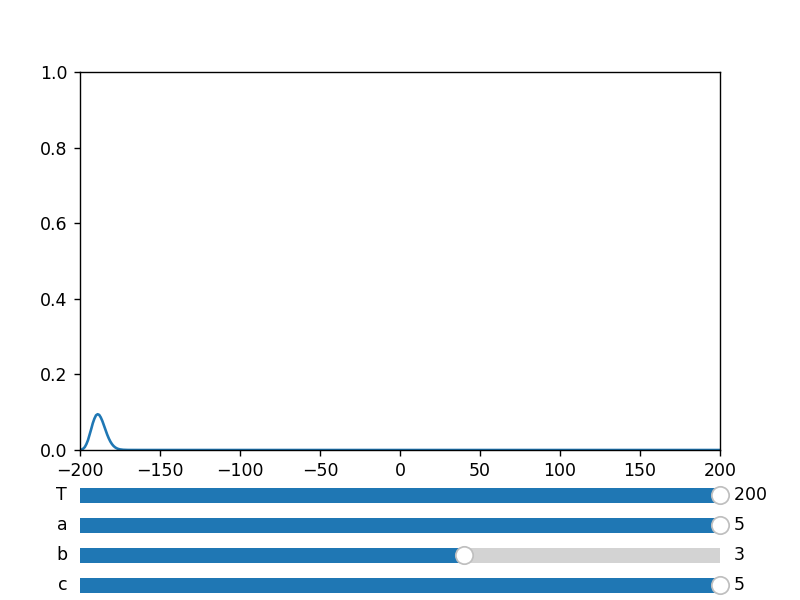

In [10]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a, b*t, c)

In [11]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([0, 1, 0]) # a, b*t, c
S = np.array([5, 3, 2])

In [12]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


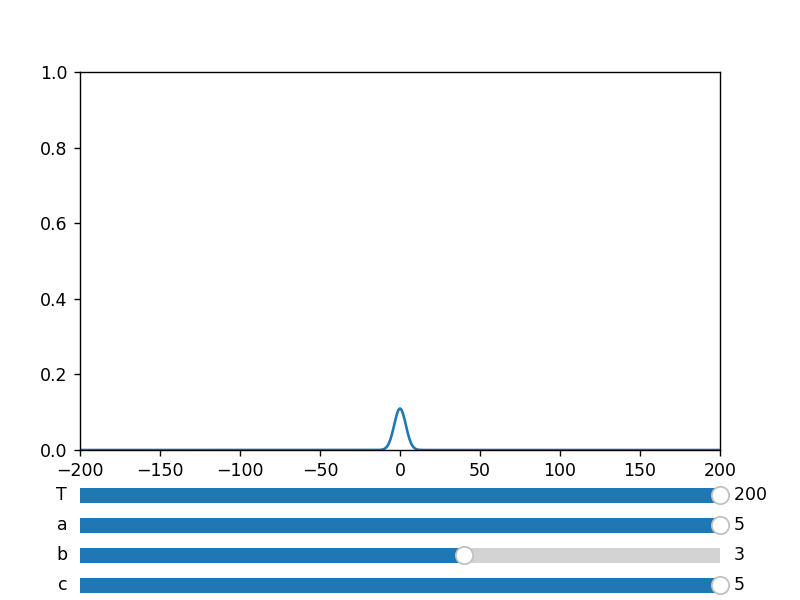

In [13]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a, b, c*t)

In [14]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([0, 0, 1]) # a, b, c*t
S = np.array([5, 3, 2])

In [15]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


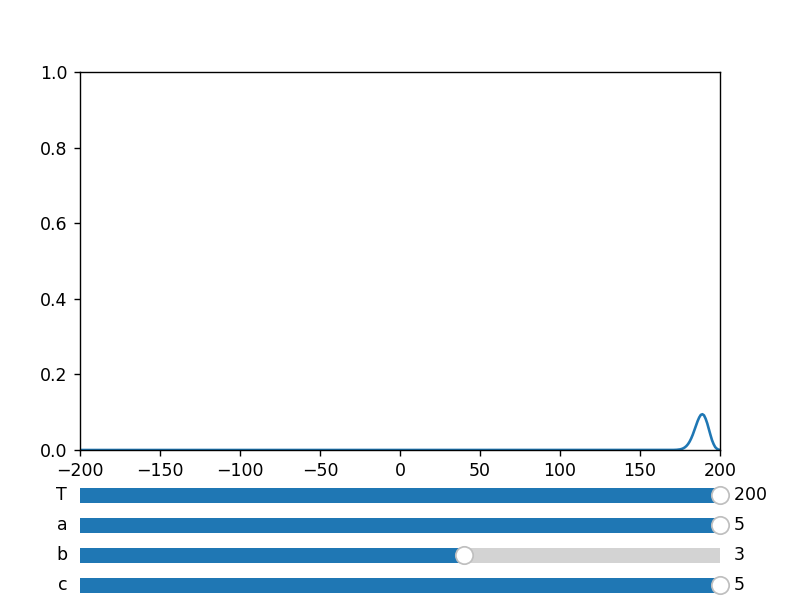

In [16]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a, b*t, c*t)

In [17]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([0, 1, 1]) # a, b*t, c*t
S = np.array([5, 3, 1])

In [18]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


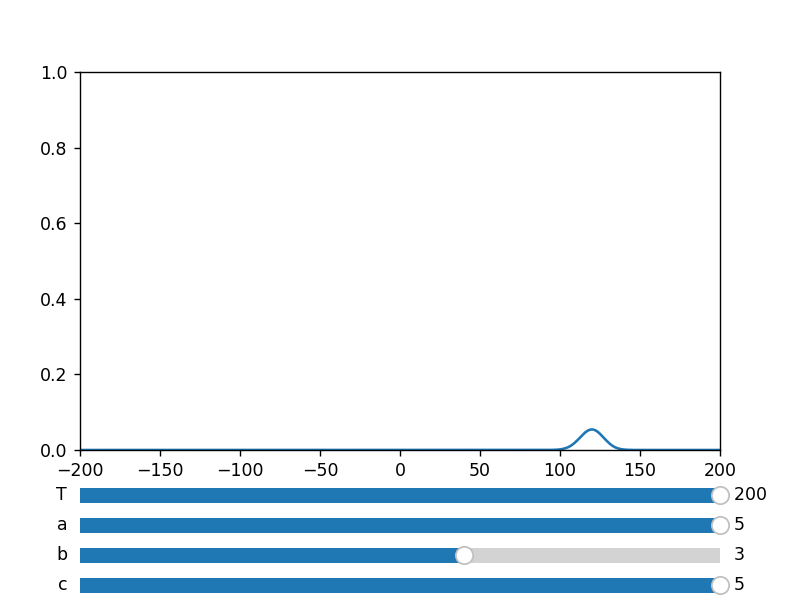

In [19]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a*t, b, c*t)

In [20]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([0, 1, 0]) # a, b*t, c
S = np.array([5, 3, 2])

In [21]:
initializeAts(t_dpc)
getAtForS_atbc(S, T, t_dpc)

<IPython.core.display.Javascript object>


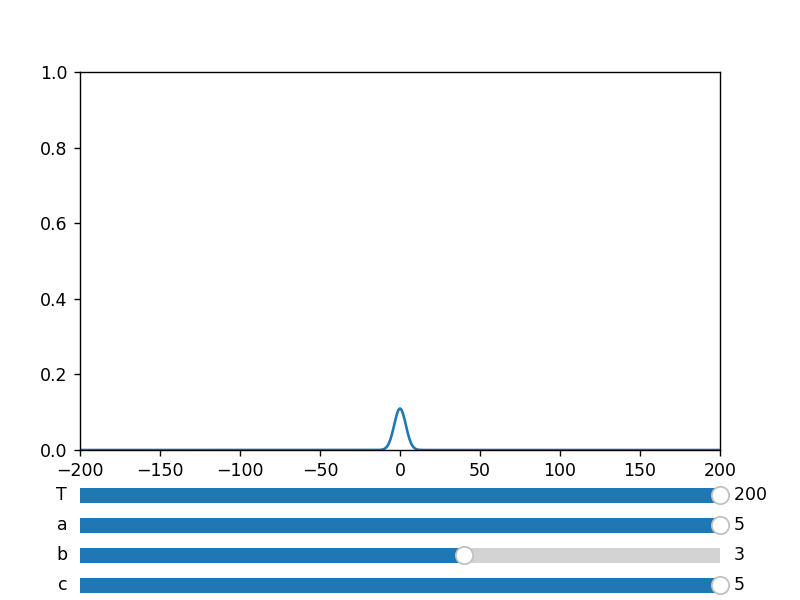

In [22]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a*t, b*t, c)

In [23]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([1, 1, 0]) # a*t, b*t, c
S = np.array([5, 3, 2])

In [24]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


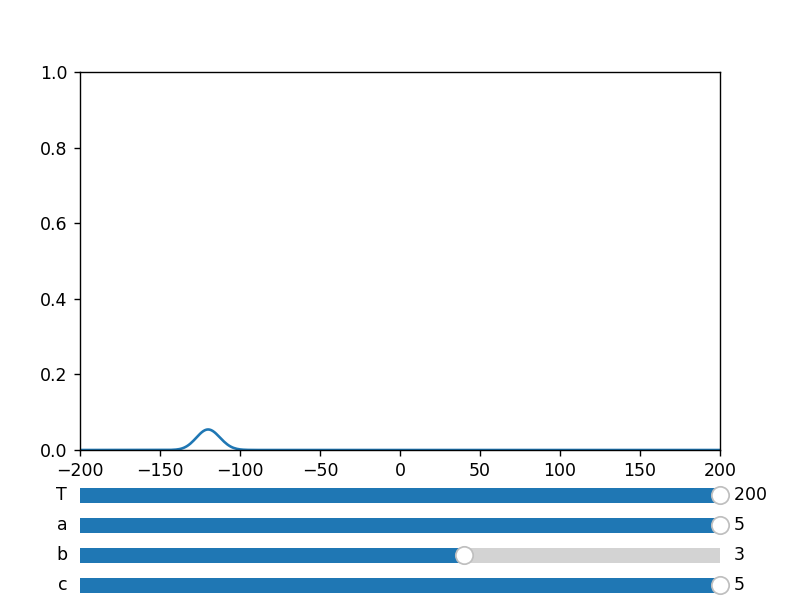

In [25]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()

### stencil: (a*t, b*t, c*t)

In [27]:
ats = np.zeros([n_slides+1, n_slides+1, n_slides+1, T+1, N])
t_dpc = np.array([1, 1, 0]) # a*t, b*t, c
S = np.array([5, 3, 2])

In [28]:
initializeAts(t_dpc)

<IPython.core.display.Javascript object>


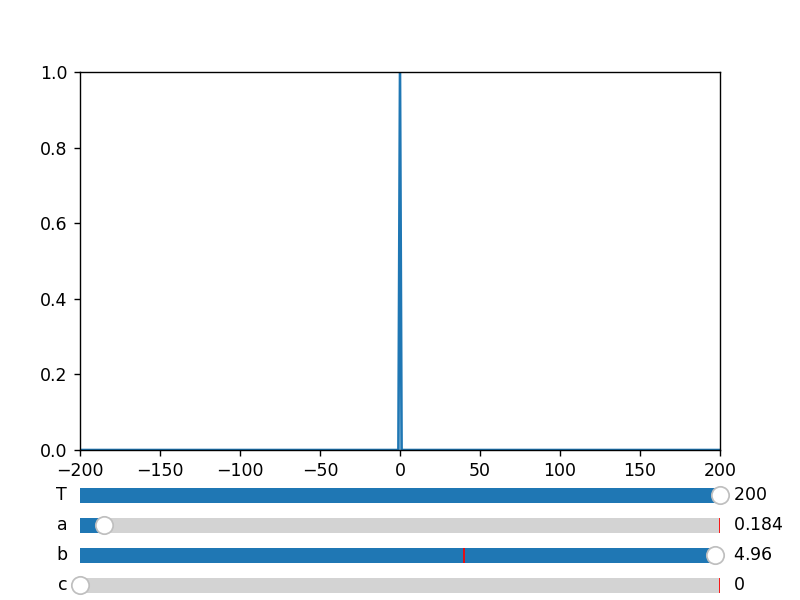

In [29]:
fig, ax = plt.subplots()

x = np.array(list(range(N))) - T
p, = ax.plot(x, ats[S_init[0]][S_init[1]][S_init[2]][T])
plt.axis([-T, T, 0, 1])
plt.subplots_adjust(left=0.1, bottom=0.25)

axT = plt.axes([0.1, 0.15, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T,
)

axA = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderA = Slider(
    ax=axA,
    label='a',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[0],
)

axB = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderB = Slider(
    ax=axB,
    label='b',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[1],
)

axC = plt.axes([0.1, 0, 0.8, 0.05])
sliderC = Slider(
    ax=axC,
    label='c',
    valmin=0,
    valmax=n_slides,
    valinit=S_init[2],
)

def update(val):
    val_A = int(sliderA.val)
    val_B = int(sliderB.val)
    val_C = int(sliderC.val)
    val_T = int(sliderT.val)
    
#     plt.axis([-T, T, 0, np.max(ats[val_A][val_B][val_C][val_T])])
    p.set_ydata(ats[val_A][val_B][val_C][val_T])

sliderT.on_changed(update)
sliderA.on_changed(update)
sliderB.on_changed(update)
sliderC.on_changed(update)

ax.set_xscale('linear')
plt.show()